# **Доверительные интервалы:**

Строим линейную модель, для которой и будем определять доверительный интервал:

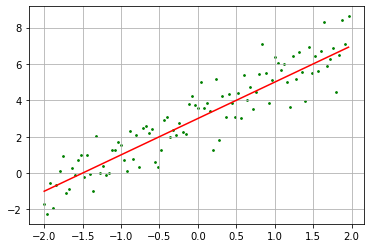

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 100    # число наблюдений (выборка данных)
sigma = 1  # стандартное отклонение (разброс) наблюдаемых значений
k = 2    # теоретическое значение параметра k
b = 3       # теоретическое значение параметра b
d =4  # диапазон значений x

x = np.array(range(N))/N*d-d/2
f = np.array([k*z+b for z in x])
y = f + np.random.normal(0, sigma, N)

plt.plot(x,f,c='red')
plt.scatter(x,y,s=3,c='green')
plt.grid(True)
plt.show()

In [4]:
mx = x.sum()/N
my = y.sum()/N
a2 = np.dot(x.T, x)/N
a11 = np.dot(x.T, y)/N

kn = (a11 - mx*my)/(a2 - mx**2)
bn = my - kn*mx
fn = np.array([kn*z+bn for z in x])

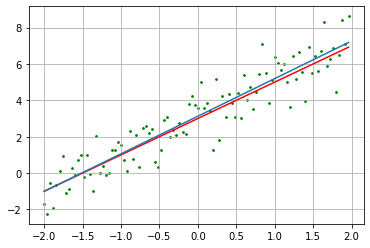

In [5]:
plt.plot(x,f,c='red')
plt.scatter(x,y,s=3,c='green')
plt.grid(True)
plt.plot(x,fn)
plt.show()

Вычислим значения, необходимые для расчета отклонений:

In [6]:
x_av=sum(x)/N
x0=x-x_av
#b=b + k*x_av
D2=sum((y-f)**2)/(N-2)
#print(D2)
a_av=sum(x0*y)/sum(x0**2)
b0_av=sum(y)/N
b=x_av*(-1)*a_av+b0_av
print(b)

3.126042691021845


In [7]:
print((D2/sum((x-x_av)**2)))

0.007109045678789963


**Задание 1:** Постройте доверительный интервал для линейной:

Найдем величины отклонений и интервалы:

In [8]:
t=2.64 # 
y_plus=[]
y_minus=[]
for i in range(N):
  #print(sum(x-x_av))
  y_pl=a_av*x[i]+b+t*((D2/sum((x-x_av)**2))*((sum(x**2)/N)-2*x_av*x[i]+x[i]**2))**(1/2)
  y_plus.append(y_pl)
  y_mn=a_av*x[i]+b-t*((D2/sum((x-x_av)**2))*((sum(x**2)/N)-2*x_av*x[i]+x[i]**2))**(1/2)
  y_minus.append(y_mn)
print(y_plus)
print(y_minus)

[-0.4982661663874781, -0.4232474433149159, -0.34818744684317465, -0.2730842382313555, -0.1979357674383831, -0.12273986610565402, -0.04749424012352438, 0.027803538230258606, 0.10315603858901828, 0.17856598123733303, 0.25403624629258176, 0.32956988332088794, 0.4051701213722526, 0.4808403794094414, 0.556584277092695, 0.6324056458671843, 0.7083085402819556, 0.784297249447492, 0.8603763085135527, 0.9365505100192436, 1.0128249149329511, 1.089204863160611, 1.1656959832565783, 1.242304201022261, 1.3190357466239662, 1.3958971598038623, 1.4728952926978012, 1.5500373097128548, 1.6273306838584447, 1.7047831888713922, 1.7824028864316608, 1.8601981077375325, 1.938177428703145, 2.0163496380650856, 2.094723697746242, 2.173308694932323, 2.2521137854767894, 2.331148128468956, 2.410420812080477, 2.4899407711456982, 2.5697166973243686, 2.649756943127111, 2.7300694215339596, 2.810661503376091, 2.89153991504697, 2.972710639424255, 3.0541788230811613, 3.13594869291296, 3.2180234851777856, 3.3004053896409733,

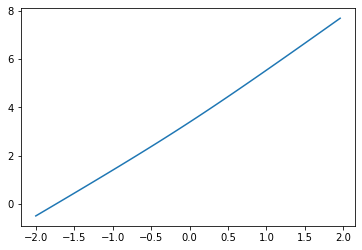

In [9]:
plt.plot(x,y_plus)
plt.show()

Красивое

**Вопрос 2:** (Это же ответ на вопрос 3): Постройте доверительную область прогнозных оценок: 
Выведите на одном графике эксперементальные данные (точки), линейную модель, доверительные интервалы линейной модели и доверительную область прогнозных оценок.

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.    1.08  1.16  1.24  1.32  1.4   1.48  1.56  1.64  1.72  1.8
  1.88  1.96  2.04  2.12  2.2   2.28  2.36  2.44  2.52  2.6   2.68  2.76
  2.84  2.92  3.    3.08  3.16  3.24  3.32  3.4   3.48  3.56  3.64  3.72
  3.8   3.88  3.96  4.04  4.12  4.2   4.28  4.36  4.44  4.52  4.6   4.68
  4.76  4.84  4.92  5.    5.08  5.16  5.24  5.32  5.4   5.48  5.56  5.64
  5.72  5.8   5.88  5.96  6.04  6.12  6.2   6.28  6.36  6.44  6.52  6.6
  6.68  6.76  6.84  6.92]


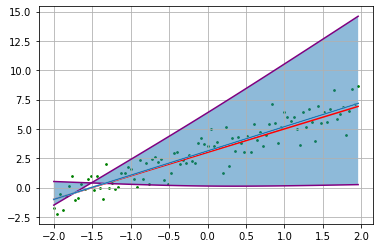

In [10]:
print (f)
plt.plot(x,f,c='red')
plt.plot(x, f+y_plus, c='purple')
plt.plot(x, f-y_minus, c='purple')
plt.plot(x, fn, c='white')
plt.scatter(x,y,s=3,c='green')
plt.fill_between(x, f+y_plus, f-y_minus, alpha=0.5)
plt.grid(True)
plt.plot(x,fn)
plt.show()

**Вопрос 4:** 

Данные по цене за вино

In [11]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
year=[1890,1900,1920,1931,1934,1935,1940,1941,1944,1948,1950,1952, 1955, 1960]
delta=np.array([])
for data in year:
    delta=np.append(delta, 1972-data)
cost = np.array([50.00, 34.90, 25.00, 12.00, 15.00, 13.00, 6.98, 10.00, 5.99, 8.98, 6.98, 4.99, 5.98, 4.98])
print(delta)
print(cost)


[82. 72. 52. 41. 38. 37. 32. 31. 28. 24. 22. 20. 17. 12.]
[50.   34.9  25.   12.   15.   13.    6.98 10.    5.99  8.98  6.98  4.99
  5.98  4.98]


Сортируем

In [12]:
d=list(zip(delta,cost))
d.sort()
delta_sort=np.array([i[0] for i in d])
cost_sort=np.array([i[1] for i in d])
print(delta_sort)
print(cost_sort)


[12. 17. 20. 22. 24. 28. 31. 32. 37. 38. 41. 52. 72. 82.]
[ 4.98  5.98  4.99  6.98  8.98  5.99 10.    6.98 13.   15.   12.   25.
 34.9  50.  ]


Строим график

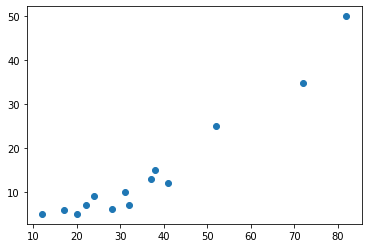

In [13]:
plt.plot(delta_sort, cost_sort, 'o')
plt.show()

In [14]:
N=len(cost_sort)
mx = sum(delta_sort)/N
my = cost_sort.sum()/N
a2 = np.dot(delta_sort.T, delta_sort)/N
a11 = np.dot(delta_sort.T, cost_sort)/N

kn = (a11 - mx*my)/(a2 - mx**2)
bn = my - kn*mx
fn = np.array([kn*z+bn for z in delta_sort])

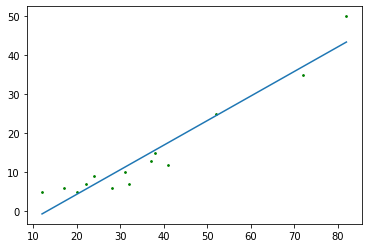

In [15]:

plt.scatter(delta_sort,cost_sort,s=3,c='green')
#plt.grid(True)
plt.plot(delta_sort,fn)
plt.show()

In [16]:
def arr(x, y, f, N):
  x_av=sum(x)/N
  x0=x-x_av
  #b=b + k*x_av
  D2=sum((y-f)**2)/(N-2)
  #print(D2)
  a_av=sum(x0*y)/sum(x0**2)
  b0_av=sum(y)/N
  b=x_av*(-1)*a_av+b0_av
  return(D2, b, a_av)
D2,b,a_av=arr(delta_sort, cost_sort, fn, len(cost_sort))

In [17]:
t=0.5 # 
y_plus=[]
y_minus=[]
x=delta_sort
N=len(cost_sort)
for i in range(N):
  #print(sum(x-x_av))
  y_pl=a_av*x[i]+b+t*((D2/sum((x-x_av)**2))*((sum(x**2)/N)-2*x_av*x[i]+x[i]**2))**(1/2)
  y_plus.append(y_pl)
  y_mn=a_av*x[i]+b-t*((D2/sum((x-x_av)**2))*((sum(x**2)/N)-2*x_av*x[i]+x[i]**2))**(1/2)
  y_minus.append(y_mn)
print(y_plus)
print(y_minus)

[-0.124383293103973, 3.041958644665268, 4.944641882369283, 6.2141951446644175, 7.484568636724072, 10.027580396611013, 11.936635064148481, 12.573298699865653, 15.758724047161781, 16.39619678095697, 18.309310140342, 25.331538563312847, 38.11974910764001, 44.520112203414634]
[-1.1815571524829949, 1.943912177956847, 3.8163157011782816, 5.063486946166778, 6.309837961390757, 8.80027521607108, 10.666307309459066, 11.288005927383708, 14.39439184829666, 15.01528136814329, 16.87725476968371, 23.697011136772836, 36.07604566528202, 42.25930510592554]


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.    1.08  1.16  1.24  1.32  1.4   1.48  1.56  1.64  1.72  1.8
  1.88  1.96  2.04  2.12  2.2   2.28  2.36  2.44  2.52  2.6   2.68  2.76
  2.84  2.92  3.    3.08  3.16  3.24  3.32  3.4   3.48  3.56  3.64  3.72
  3.8   3.88  3.96  4.04  4.12  4.2   4.28  4.36  4.44  4.52  4.6   4.68
  4.76  4.84  4.92  5.    5.08  5.16  5.24  5.32  5.4   5.48  5.56  5.64
  5.72  5.8   5.88  5.96  6.04  6.12  6.2   6.28  6.36  6.44  6.52  6.6
  6.68  6.76  6.84  6.92]


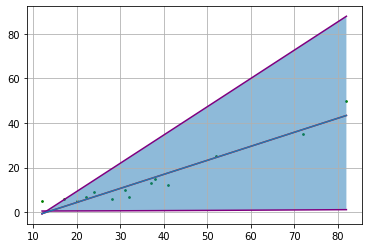

In [18]:
print (f)
plt.plot(x,fn,c='red')
plt.plot(x, fn+y_plus, c='purple')
plt.plot(x, fn-y_minus, c='purple')
plt.scatter(delta_sort,cost_sort,s=3,c='green')
plt.fill_between(x, fn+y_plus, fn-y_minus, alpha=0.5)
plt.grid(True)
plt.plot(x,fn)
plt.show()

Вопрос 5: Для 3 варианта.  